# Titanic - Machine Learning from Disaster

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
titanic_file_path = '../data/titanic/train.csv'

In [4]:
df = pd.read_csv(titanic_file_path) 

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Аналіз категоріальних даних

Змінні бувають категоріальні і кількісні. Подивимося які є змінні в наборі даних Титаніку

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Категоріальними змінними є Name, Sex, Ticket, Cabin, Embarked - зайшов на борт якщо опиратися тільки на цю табличку.
В реальності ж Ticket і Name не є категоріальними, тому що вони унікальні і по одній одиниці.

#### Критерії категоріальності
- Кількість унікальних значень мала (≤10–15)
- Значення мають сенс як класи (стать, клас, регіон, порт)
- Значення не виглядають як ID/імена/коди - їх взагалі можна відкинути

Дійсно категоріальні змінні можна знайти наступним скриптом - порахувати унікальні значення і відфільтрувати ті що більші за 15

In [8]:
output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique'])

for col in df:
        if df[col].nunique() <= 15:
            output_df.loc[col] = [df[col].count(),           # Count
                                  df[col].isnull().sum(),  # Missing 
                                  df[col].nunique()]        # Unique]

output_df

,Count,Missing,Unique
Survived,891,0,2
Pclass,891,0,3
Sex,891,0,2
SibSp,891,0,7
Parch,891,0,7
Embarked,889,2,3


**Survived** - 0 = No, 1 = Yes

**Pclass** - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

**Sex** - F, M

**SibSp** - # of siblings / spouses aboard the Titanic	

**Parch** - # of parents / children aboard the Titanic

**Embarked** - Port C = Cherbourg, Q = Queenstown, S = Southampton

## Частотні таблиці однієї змінної

### 1. Survived

In [9]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

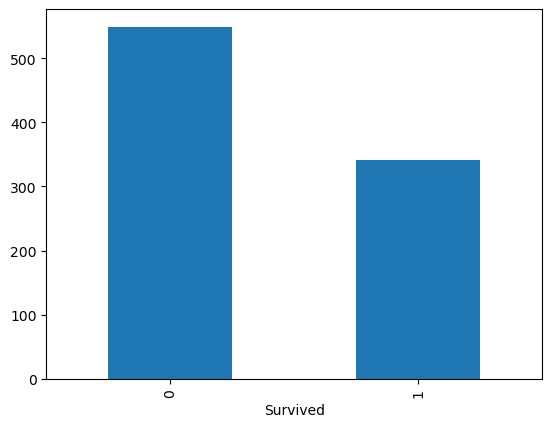

In [10]:
df['Survived'].value_counts().plot(kind='bar')

З 891 пасажирів вижило 342, 542 - загинули

### 2. PClass

In [11]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

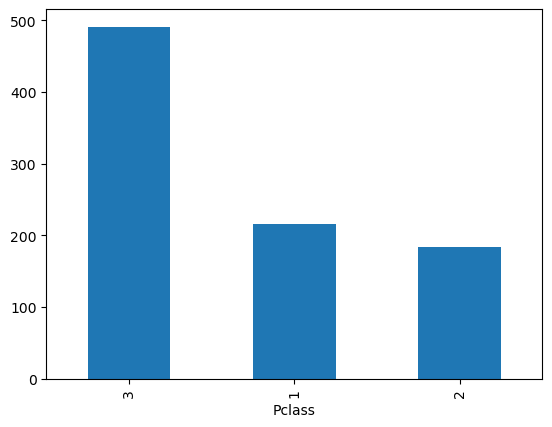

In [12]:
df['Pclass'].value_counts().plot(kind='bar')

На борту було 491 пасажир з 3-го класу, 216 пасажирів - 2-го класу, 184 пасажира - 1-го класу

### 3. Sex

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

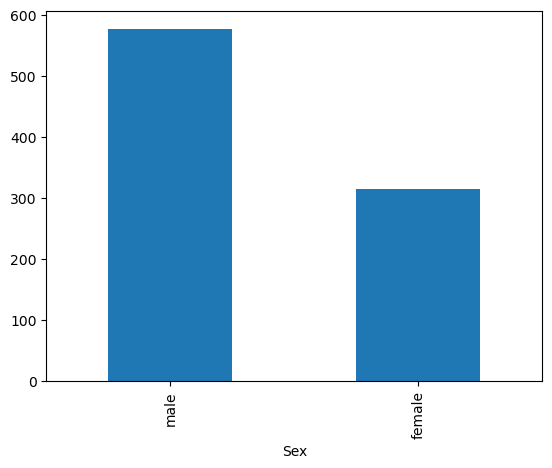

In [14]:
df['Sex'].value_counts().plot(kind='bar')

На борту було 577 чоловіків і 314 жінок

### 4. SibSp

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

In [15]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

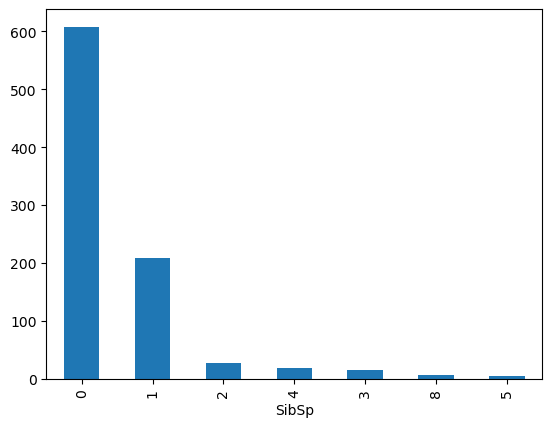

In [16]:
df['SibSp'].value_counts().plot(kind='bar')

Найбільше пасажирів було без родичей - 608 людей, 209 - заміжні пари, і далі вже люди які мали родичей

Тут детальніший аналіз як це можна буде використати https://www.kaggle.com/code/ailuropus/extracting-family-relationships-on-titanic-sibsp 

### 5. Parch

In [17]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

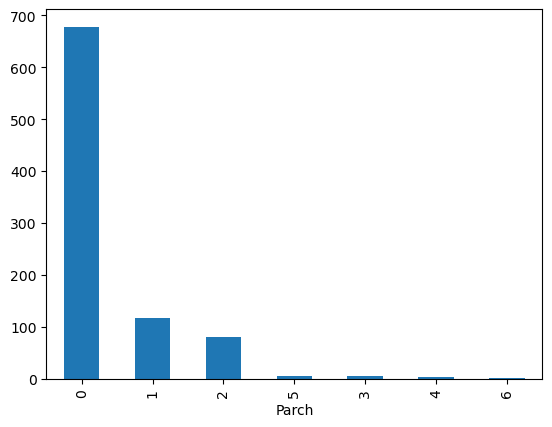

In [18]:
df['Parch'].value_counts().plot(kind='bar')

Тут я не зовсім зрозуміла як це рахується. Чи входить в 2 - дитина, чоловік і жінка. Тому вирішила глянути в датасеті у кого є такі цифри
Так як 6 має всього одна людина - її буде просто знайти.

In [19]:
df[df['Parch'] == 6][['Name', 'Age']]

,Name,Age
678,"Goodwin, Mrs. Frederick (Augusta Tyler)",43.0


Тут я очікувала що їх буде більше. Тобто батьки і діти будуть мати одну і ту саму цифру, але виявилося..

In [20]:
df[df['Name'].str.contains('Goodwin', case=False, na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


Parch - це скільки дітей всього має певна людина + себе.
А діти між собою обʼєднані кількістю SibSp.

### 6. Embarked

In [22]:
embarked = df['Embarked'].value_counts()

In [23]:
type(embarked)

pandas.core.series.Series

In [24]:
embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

C = Cherbourg, Q = Queenstown, S = Southampton

<Axes: xlabel='Embarked'>

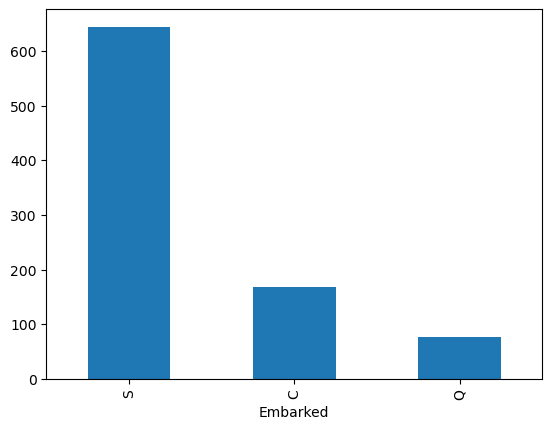

In [25]:
df['Embarked'].value_counts().plot(kind='bar')

### Висновки
З 891 пасажирів вижило 342, 542 - загинули
- На борту було 491 пасажирів з 3-го класу, 216 пасажирів - 2-го класу, 184 пасажира - 1-го класу
- На борту було 577 чоловіків і 314 жінок
- 678 пасажирів було без дітей, 608 пасажирів без подружжя (можна детальніше аналізувати Parch і SibSp бо вони поєднані)
- 644 зайшли на борт в Southampton

## Частотні таблиці двох змінних

### Survived

#### Жінки чи чоловіки?

In [26]:
ct_counts = pd.crosstab(df['Sex'], df['Survived'])
ct_counts['Total'] = ct_counts.sum(axis=1)
#ct_counts.loc['Total'] = ct_counts.sum()
ct_counts

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577


In [27]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index').round(2)

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


74% жінок вижило, 81% чоловіків померло

Це відбулося скоріш за все через те, що спасали жінок більше. Але мені цікаво було б ще тут подивится вік. Дітей теж мали спасати в першу чергу

#### Клас квитків і виживаємість

In [28]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').round(2)

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24


63% першого класу вижило і 47% другого - вижило

In [29]:
### Родинність

# TODO 
- [X] Parch і SibSp - переглянути що це мається на увазі. Якщо SibSp це зрозуміло що кількість родичів, а от Parch - не зрозуміло чи це тільки діти чи батьки і діти. Чи входять вони в SibSp? Чи правильно я розумію що там чоловік, жінка і кількість дітей?
- [ ] Побудувати граф Parch і SibSp
- [ ] 20% чоловіків вижили - можливо це діти?

# Гіпотези

- [ ] Жінки вижили (але не всі). Які критерії підвищили виживаємість жінці?
- [ ] Чоловіки-діти - вижили
- [ ] Пасажири 1-го класу - вижили